In this notebook we will look at recursive feature elimination with cross validation (RFECV). We will also take another look at Random Forest model. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
abalone = pd.read_csv("abalone.data", header=None)
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                  'Whole Weight', 'Shucked Weight', ' Viscera Weight',
                  'Shell Weight', 'Ring']
print(abalone.head())
print(abalone.tail())

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245   
1   M   0.350     0.265   0.090        0.2255          0.0995   
2   F   0.530     0.420   0.135        0.6770          0.2565   
3   M   0.440     0.365   0.125        0.5160          0.2155   
4   I   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  
     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

In [3]:
#We have to change the sex, which is a categorical value, 
#to numeric value 0 and 1

abalone['Sex'].replace(['M', 'F', 'I'],[0,1,2], inplace=True)
print(abalone.head())


   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  Ring  
0           0.1010         0.150    15  
1           0.0485         0.070     7  
2           0.1415         0.210     9  
3           0.1140         0.155    10  
4           0.0395         0.055     7  


In [4]:
# Attribute and target split
X = abalone.drop(['Ring'], axis=1)
y = abalone[['Ring']]
print(X.head())
print(y.head())

   Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

    Viscera Weight  Shell Weight  
0           0.1010         0.150  
1           0.0485         0.070  
2           0.1415         0.210  
3           0.1140         0.155  
4           0.0395         0.055  
   Ring
0    15
1     7
2     9
3    10
4     7


In [5]:
#convert to array to be passed to numpy

#X = np.array(X)
y = np.array(y).ravel()

print(X)
print("-----------------------")
print(y)

      Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
5       2   0.425     0.300   0.095        0.3515          0.1410   
6       1   0.530     0.415   0.150        0.7775          0.2370   
7       1   0.545     0.425   0.125        0.7680          0.2940   
8       0   0.475     0.370   0.125        0.5095          0.2165   
9       1   0.550     0.440   0.150        0.8945          0.3145   
10      1   0.525     0.380   0.140        0.6065          0.1940   
11      0   0.430     0.350   0.110        0.4060          0.1675   
12      0   0.490     0.380   0.135        0.5415          0.2175   
13      1   0.535     0.405   0.14

In [6]:
from sklearn.cross_validation import train_test_split 
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                   random_state=10)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Recursive feature elimination shows the cv-scores with selected numbers of features. It shows the most optimal number of features needed to achieve the highest cv-scores possible.

In [19]:
#Cross Validation
#Recursive feature elimination with cv (rfecv)
#ref: 0.16.1 p. 712

from sklearn.svm import SVR
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

svr = SVR(kernel='linear', C=1e3)

rfecv = RFECV(estimator=svr)
rfecv.fit(X_scaled, y)

print("Optimal # of features: %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classification)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1). rfecv.grid_scores_)

#RUNNING TIME EXCESSIVELY LONG!


RFECV(cv=None,
   estimator=SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
   estimator_params=None, scoring=None, step=1, verbose=0)

Optimal # of features: 7


(0, 9)

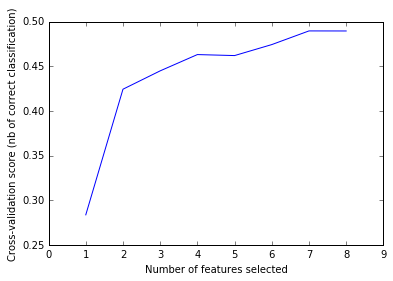

In [25]:
print("Optimal # of features: %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classification)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlim(0,9)

Score of Random Forest:  0.566099132354
CV Score:  0.46386400605
MSE:  4.45010382775


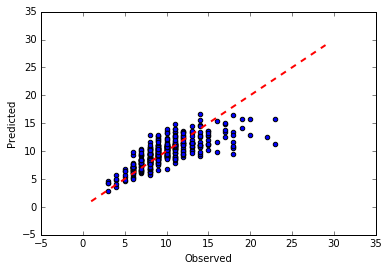

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', max_depth=None, 
                               min_samples_split=1, 
                               random_state=0,
                              max_features='sqrt')
forest.fit(X_train_scaled, y_train)
y_predict = forest.predict(X_test_scaled)
score = forest.score(X_test_scaled, y_test)
cv_score = cross_val_score(forest, X_scaled, y, cv=5)
print("Score of Random Forest: ", score.mean())
print("CV Score: ", cv_score.mean() )
print("MSE: ", mean_squared_error(y_test, y_predict))

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

Score of Random Forest:  0.568988945946
CV Score:  0.529268291396
MSE:  4.42046578947


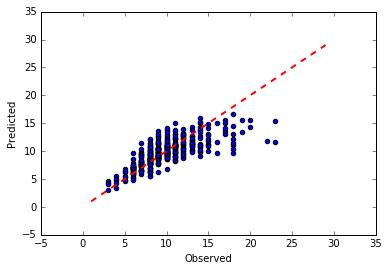

In [20]:
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', max_depth=None, 
                               min_samples_split=1, 
                               random_state=0,
                              max_features='log2')
forest.fit(X_train_scaled, y_train)
y_predict = forest.predict(X_test_scaled)
score = forest.score(X_test_scaled, y_test)
cv_score = cross_val_score(forest, X_scaled, y, cv=3)
print("Score of Random Forest: ", score.mean())
print("CV Score: ", cv_score.mean() )
print("MSE: ", mean_squared_error(y_test, y_predict))

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

Score of Random Forest:  0.557394142444
CV Score:  0.517609785358
MSE:  4.53938253589


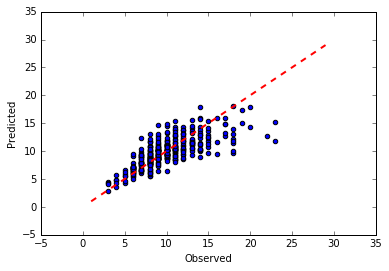

In [21]:
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', max_depth=None, 
                               min_samples_split=1, 
                               random_state=0,
                              max_features='auto')
forest.fit(X_train_scaled, y_train)
y_predict = forest.predict(X_test_scaled)
score = forest.score(X_test_scaled, y_test)
cv_score = cross_val_score(forest, X_scaled, y, cv=3)
print("Score of Random Forest: ", score.mean())
print("CV Score: ", cv_score.mean() )
print("MSE: ", mean_squared_error(y_test, y_predict))

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

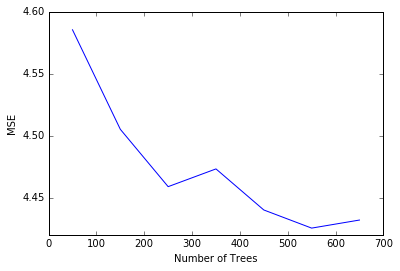

In [25]:
mse = []

trees = np.arange(50, 700, 100)
for t in trees:
    forestreg = RandomForestRegressor(n_estimators=t,
                                     max_depth = None,
                                     max_features= 7,
                                     oob_score=False,
                                     random_state=326)
    forestreg.fit(X_train_scaled, y_train)
    y_predict = forestreg.predict(X_test_scaled)
    mse.append(mean_squared_error(y_test, y_predict))
    
fig, ax = plt.subplots()
ax.plot(trees, mse)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("MSE")
    

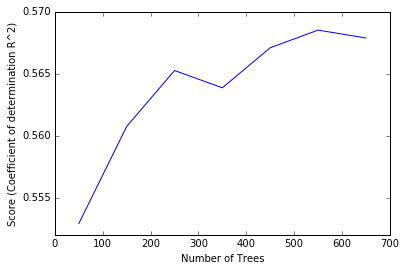

In [34]:
scores = []

trees = np.arange(50, 700, 100)
for t in trees:
    forestreg = RandomForestRegressor(n_estimators=t,
                                     max_depth = None,
                                     max_features= 7,
                                     oob_score=False,
                                     random_state=326)
    forestreg.fit(X_train_scaled, y_train)
    #y_predict = forestreg.predict(X_test_scaled)
    scores.append(forestreg.score(X_test_scaled, y_test))
    
fig, ax = plt.subplots()
ax.plot(trees, scores)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Score (Coefficient of determination R^2)")
    

In [33]:
print(min(mse))
print(min(scores))
print(trees)

4.42539970738
0.552912501953
[ 50 150 250 350 450 550 650]


Feature ranking:
1. feature 7 (0.458482)
2. feature 5 (0.158521)
3. feature 4 (0.087520)
4. feature 3 (0.080979)
5. feature 6 (0.075091)
6. feature 2 (0.058198)
7. feature 1 (0.054255)
8. feature 0 (0.026953)


(-1, 8)

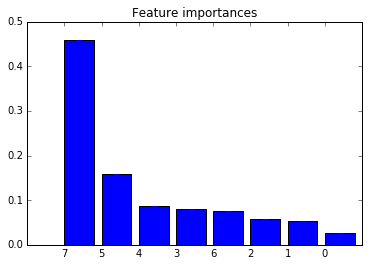

In [30]:
importances = forestreg.feature_importances_

std = np.std([forestreg.feature_importances_ for tree in forestreg.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(8):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(8), importances[indices],
       color="b", yerr=std[indices])
plt.xticks(range(8), indices)
plt.xlim([-1,8])

